## Imports

In [1]:
import keras
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
% matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
% load_ext autoreload
% autoreload 2

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load Data

In [2]:
# Load data
video_data = pd.read_csv('data/challenge_2/video_count.csv')

# Sort data by video ID and date
video_data = video_data.sort_values(by=['video_id', 'date'])
video_data = video_data.reset_index(drop=True)
video_data.shape

(41775, 3)

In [3]:
video_data.head(5)

,video_id,counts,date
0,1,140460,2015-01-01
1,1,129082,2015-01-02
2,1,120868,2015-01-03
3,1,97849,2015-01-04
4,1,94821,2015-01-05


In [4]:
video_features = pd.read_csv('data/challenge_2/video_features.csv')
video_features = video_features.sort_values(by=['video_id'])
video_features = video_features.reset_index(drop=True)
video_features.shape

(2785, 5)

In [5]:
video_features.head(5)

,video_id,video_length,video_language,video_upload_date,video_quality
0,1,1496,Es,2014-12-04,720p
1,2,751,Cn,2014-12-14,480p
2,3,807,En,2014-12-15,1080p
3,4,545,En,2014-12-11,360p
4,5,953,En,2014-12-10,1080p


## Group counts to same video_id

In [35]:
counts = np.zeros((int(video_data.counts.shape[0]/15), 15))
video_id = np.zeros((int(video_data.video_id.shape[0]/15), 15))

for i in range(2785):
    for j in range(15):
        counts[i, j] = video_data['counts'][(i*15)+j]
        video_id[i,j] = video_data['video_id'][(i*15)+j]


## Normalise data

In [7]:
counts_norm = np.zeros(counts.shape)

for i in range(counts.shape[0]):
    counts_norm[i,:] = counts[i,:] / counts[i,0]

In [8]:
concat = np.concatenate((counts, counts_norm), axis=1)
concat.shape

(2785, 30)

## Clustering

In [9]:
from sklearn.cluster import KMeans
import numpy as np


kmeans = KMeans(n_clusters=3, random_state=0).fit(counts)
kmeans.labels_[:100]

array([0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 2,
       0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

In [11]:
kmeans.cluster_centers_[:,3]

array([ 165792.16684212, 2474525.44117648, 1203529.57729942])

In [12]:
row_dict = {i: np.where(kmeans.labels_ == i)[0] for i in range(kmeans.n_clusters)}

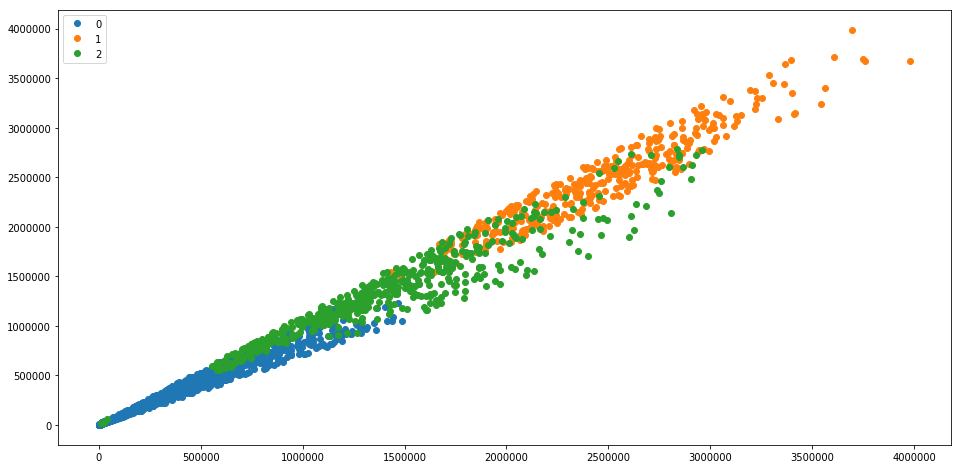

In [14]:
# Plot the results

code = ['0', '1', '2']
plt.figure(figsize=(16,8))
for i in set(kmeans.labels_):
    index = kmeans.labels_ == i
    plt.plot(counts[index,0], counts[index,1], 'o', label=code[i])
#     plt.hist(new[index,1], bins=100, label=code[i])
plt.legend()
plt.show()

## Characteristics of "Hot" Videos

In [ ]:
row_dict[1]

In [ ]:
video_features

(2785, 15)

In [15]:
from sklearn.manifold import TSNE
counts_embedded = TSNE(n_components=2).fit_transform(counts)
counts_embedded.shape

(2785, 2)

In [38]:
from sklearn.manifold import TSNE
video_id_embed = TSNE(n_components=2).fit_transform(video_id)
video_id_embed.shape

(2785, 2)

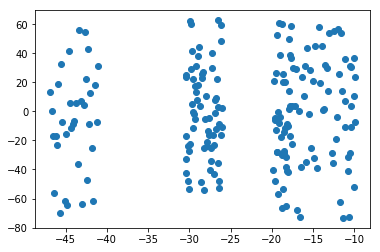

In [39]:
plt.scatter(video_id_embed[:100], counts_embedded[:100])